<a href="https://colab.research.google.com/github/Nhathuyy/DececionTreeDrug/blob/main/GK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2022-08-06 04:25:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2022-08-06 04:25:57 (708 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [ ]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
 
# Xem chiều dài của df, tương đương shape[0]
print('Len:', len(my_data))
# Xem thông tin dataframe vừa đọc được
my_data.info()
# Xem kích thước của dataframe
print('Shape:', my_data.shape)

Len: 200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
Shape: (200, 6)


Bộ dữ liệu được sử dụng cho bài toán này là bộ dữ liệu về giá nhà ở ở boston bao gồm 6 quan sát và 200 biến

# Ý nghĩa của những trường dữ liệu:
Các biến đầu vào:

*   Age        : Độ tuổi
*   Sex        : Giới Tính
*   BP         : Áp lực máu ( huyết áp )
*   Cholesterol: Chất béo trong máu
*   Na_to_K.   : Ion quan trọng   
Biến mục tiêu: Căn cứ vào các chỉ số trên ta đưa ra các loại thuốc phù hợp
-note:
 chi tiết về các ion điện giải: https://healthvietnam.vn/thu-vien/tai-lieu-tieng-viet/hoa-sinh/dinh-luong-cac-chat-dien-giai-na-k-cl










# Pre-processing 
# Sử dụng my_data làm dữ liệu Drug.csv được đọc bởi pandas,  khai báo các biến sau:


*   X là Ma trận tính năng (dữ liệu của my_data)
*   y là vectơ phản hồi (mục tiêu)

Loại bỏ cột chứa tên mục tiêu vì nó không chứa các giá trị số.

In [ ]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

mã hoá các giá trị biến đầu vào cho phù hợp với mô hình

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Setting up the Decision Tree
Chúng ta sẽ sử dụng phân tách đào tạo / thử nghiệm trên cây quyết định của chúng ta. Hãy nhập train_test_split từ sklearn.cross_validation

In [ ]:
from sklearn.model_selection import train_test_split

Bây giờ train_test_split sẽ trả về 4 tham số khác nhau. Chúng ta sẽ đặt tên cho chúng:

X_trainset, X_testset, y_trainset, y_testset

Train_test_split sẽ cần các tham số:
X, y, test_size = 0,3 và random_state = 3.

X và y là các mảng bắt buộc phải có trước khi phân tách, test_size đại diện cho tỷ lệ của tập dữ liệu thử nghiệm và random_state đảm bảo rằng chúng ta có được các phân tách giống nhau.

In [ ]:

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling
Tiếp theo ta sẽ xây dựng một mô hình phân loại dự trên cây quyết định (drugTree) với độ sâu tối đa là 4. Độ sâu ở đây chính là số lượng tối đa các câu hỏi khi đi từ node gốc tới node lá. Chúng ta khai báo độ sâu thông qua đối số max_depth.Bên trong bộ phân loại, chỉ định tiêu chí = "entropy" để chúng ta có thể thấy mức tăng thông tin của mỗi nút.

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4 )
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Tiếp theo, chúng ta sẽ khớp dữ liệu với ma trận tính năng đào tạo X_trainset và vectơ phản hồi đào tạo y_trainset

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [ ]:
predTree = drugTree.predict(X_testset)

Chúng ta có thể in predTree và y_testset nếu muốn so sánh trực quan dự đoán với các giá trị thực tế.

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation
Tiếp theo thêm thư viện metrics vào sklearn

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


Điểm phân loại độ chính xác tính toán độ chính xác của tập hợp con: tập hợp nhãn được dự đoán cho một mẫu phải khớp chính xác với tập nhãn tương ứng trong y_true.

Trong phân loại đa nhãn, hàm trả về độ chính xác của tập hợp con. Nếu toàn bộ tập hợp các nhãn được dự đoán cho một mẫu hoàn toàn khớp với tập hợp các nhãn thực, thì độ chính xác của tập hợp con là 1,0; nếu không thì nó là 0,0.

## Visualization

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


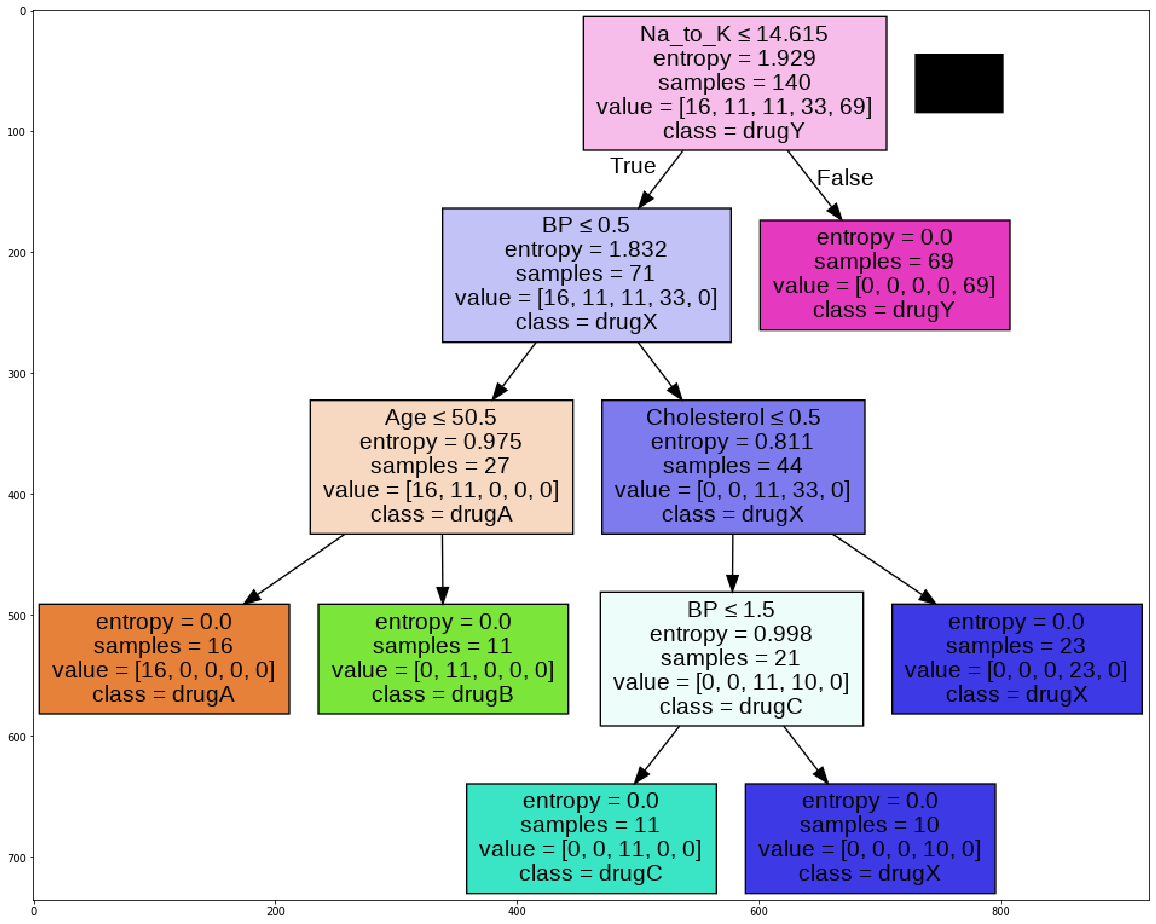

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 50))
plt.imshow(img,interpolation='nearest')

Từ cây quyết định ở trên, dựa trên việc rẽ nhánh, chúng ta suy ra được nhãn dự báo cho các quan sát. Giả sử quan sát đầu vào có giá trị: Na_to_K = 10, BP = 0,5, Age = 50. Khi đó xuất phát từ node gốc ta tuần tự đặt và trả lời các câu hỏi:




*  Na_to_K<= 14.615 là đúng, như vậy tại node gốc ta rẽ sang nhánh True bên trái.

*  Tiếp theo ta lại xét tiếp câu hỏi BP <= 0,5, kết quả trả về là True. Do đó ta lại rẽ sang nhánh bên trái.

*  Tiếp theo xét tiếp câu hỏi Age <= 50, kết quả trả về tiếp tục là True. Do đó ta rẽ sang bên trái và thu được kết quả dự báo ở node lá là nhãn drugA.



